In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

data = np.array([4,3,4,5,5,2,3,1,4,0,1,5,5,6,5,4,4,5,3,4])

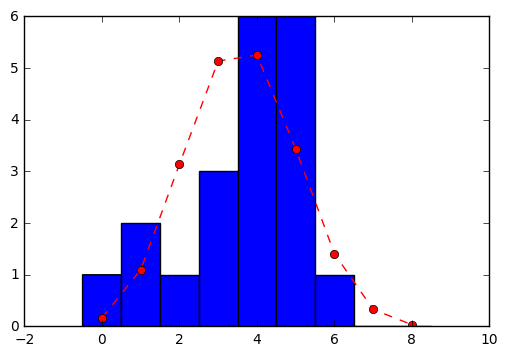

In [6]:
plt.hist(data,bins=np.arange(-0.5,9.5,1.))
plt.plot(np.arange(0,9,1),stats.binom.pmf(np.arange(0,9,1),8,0.45)*20,'--o',c='r')


In [7]:
const = np.ones(data.shape[0])
model = sm.GLM(np.array([data,8-data]).T,const,family=sm.families.Binomial())
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           ['y1', 'y2']   No. Observations:                   20
Model:                            GLM   Df Residuals:                       19
Model Family:                Binomial   Df Model:                            0
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -37.748
Date:                Mon, 13 Feb 2017   Deviance:                       28.722
Time:                        23:47:10   Pearson chi2:                     24.5
No. Iterations:                     5                                         
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.1754      0.159     -1.105      0.269        -0.487     0.136
==============================================================================
"""

In [8]:
q = 1 / (1+np.exp(-(result.params[0])))

In [9]:
q

0.45624999999999993

In [13]:
y = np.arange(0.01,1.0,0.01)
llh = np.array([np.sum(stats.binom.logpmf(data,8,i)) for i in y])

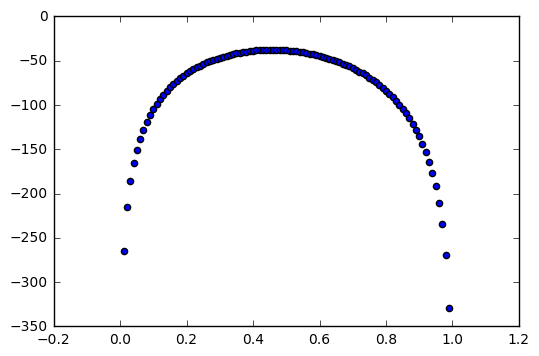

In [14]:
plt.scatter(y,llh)

In [15]:
y[np.argmax(llh)]

0.46000000000000002

In [21]:
def series_llf(q,steps=100):
    series = [[0,q]]
    llh = np.sum(stats.binom.logpmf(data,8,q))
    for i in range(steps):
        random = np.random.randint(2)
        if random == 1:
            cal = np.sum(stats.binom.logpmf(data,8,q+0.01))
            if llh <cal:
                llh = cal
                q = q + 0.01
        else:
            cal = np.sum(stats.binom.logpmf(data,8,q-0.01))
            if llh < cal:
                llh = cal
                q = q - 0.01
        series.append([i,q])
    return np.array(series)

init_3 = series_llf(0.3)
init_6 = series_llf(0.6)

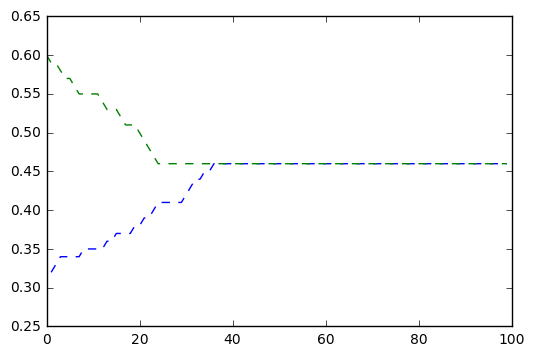

In [22]:
plt.plot(init_3[:,0],init_3[:,1],ls='--')
plt.plot(init_6[:,0],init_6[:,1],ls='--')

In [36]:
def metro(prob,size):
    llh = np.sum(stats.binom.logpmf(data,8,prob))
    series = [[0,llh]]
    for i in range(size):
        random = np.random.randint(2)
        if random == 1:
            cal = np.sum(stats.binom.logpmf(data,8,prob+0.01))
            if llh < cal:
                llh = cal
                prob += 0.01
            elif np.random.rand() < np.exp(cal - llh):
                llh = cal
                prob += 0.01
        else:
            cal = np.sum(stats.binom.logpmf(data,8,prob-0.01))
            if llh < cal:
                llh = cal
                prob -= 0.01
            elif np.random.rand() < np.exp(cal - llh):
                llh = cal
                prob -= 0.01
        
        series.append([i,prob])
                
    return np.array(series)

In [37]:
init_3_100 = metro(0.3,100)
init_3_1000 = metro(0.3,1000)
init_3_10000 = metro(0.3,10000)

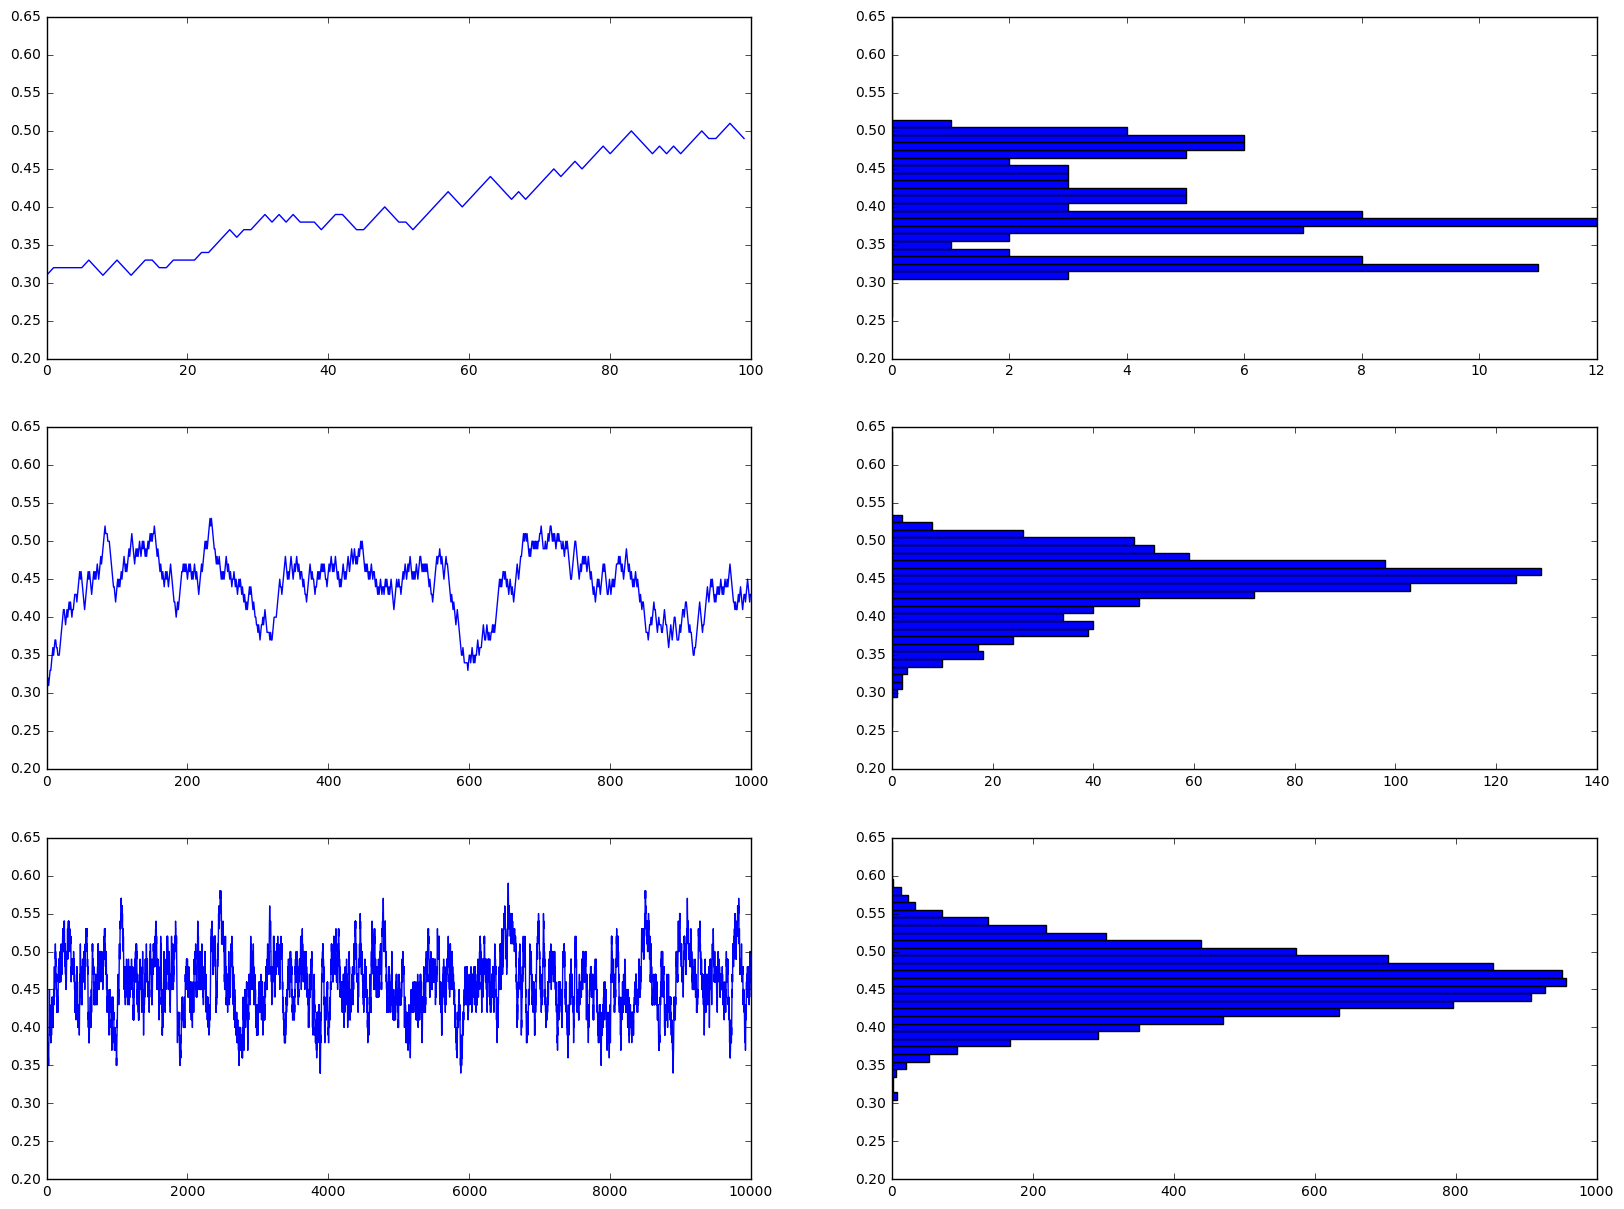

In [38]:
fig,ax = plt.subplots(3,2,figsize=(20,15))
steps = [init_3_100,init_3_1000,init_3_10000]
for i,step in enumerate(steps):
    ax[i][0].plot(step[:,0],step[:,1])
    ax[i][0].set_ylim((0.2,0.65))
    
    ax[i][1].hist(step[:,1],orientation='horizontal',bins=np.arange(0.245,0.655,0.01))

In [39]:
y = np.arange(0.25,0.66,0.01)
llh = np.array([np.sum(stats.binom.logpmf(data,8,q)) for q in y])
llh_exp = np.exp(llh)
P = llh_exp / llh_exp.sum()

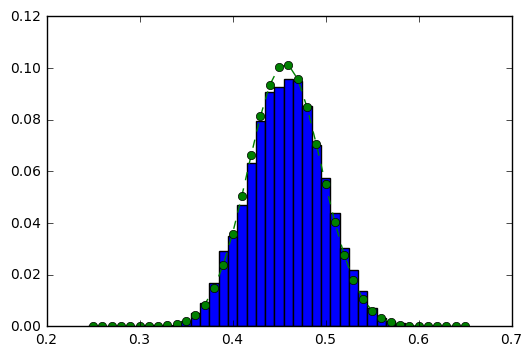

In [42]:
plt.hist(init_3_10000[:,1],bins=np.arange(0.245,0.655,0.01),weights=np.ones(init_3_10000.shape[0])*0.0001)
plt.plot(y,P,'g--o')